# Lecture 24: Radial Distribution Function

## Learning Objectives

By the end of this lecture, you will be able to:

1. Define the radial distribution function.
2. Compute the radial distribution function for a given configuration of particles.
3. Understand the physical significance of the radial distribution function.

## Radial Distribution Function

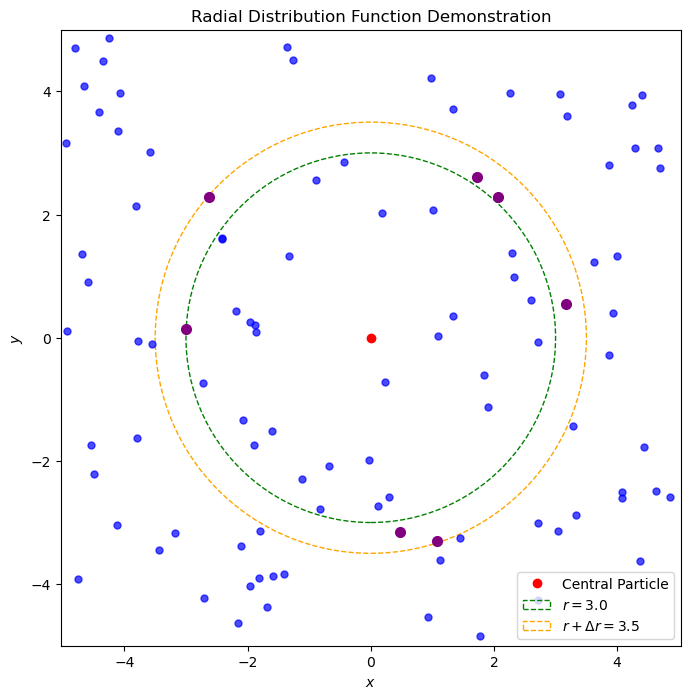

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
central_particle = (0, 0)
num_particles = 100
box_size = 10
r = 3.0  # Shell radius
dr = 0.5  # Shell thickness

# Generate random particle positions
np.random.seed(42)  # For reproducibility
particle_positions = np.random.uniform(-box_size/2, box_size/2, size=(num_particles, 2))

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-box_size/2, box_size/2)
ax.set_ylim(-box_size/2, box_size/2)
ax.set_aspect('equal', adjustable='datalim')

# Draw central particle
ax.plot(*central_particle, 'o', color='red', label='Central Particle')

# Draw surrounding particles
for pos in particle_positions:
    ax.plot(*pos, 'o', color='blue', markersize=5, alpha=0.7)

# Draw the shell
circle_inner = plt.Circle(central_particle, r, color='green', fill=False, linestyle='--', label=f'$r = {r}$')
circle_outer = plt.Circle(central_particle, r + dr, color='orange', fill=False, linestyle='--', label=f'$r + \Delta r = {r + dr}$')
ax.add_artist(circle_inner)
ax.add_artist(circle_outer)

# Annotate particles within the shell
for pos in particle_positions:
    distance = np.linalg.norm(np.array(pos) - np.array(central_particle))
    if r <= distance < r + dr:
        ax.plot(*pos, 'o', color='purple', markersize=7)

# Add labels and legend
ax.set_title('Radial Distribution Function Demonstration')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()

# Show plot
plt.show()

The radial distribution function, denoted by $g(r)$, is a measure of the "structure" of a fluid or solid. It quantifies the average number of particles at a distance $r$ from a central particle relative to the ideal gas case. The radial distribution function is defined as

$$
g(r) = \frac{\langle N(r) \rangle}{4 \pi r^2 \Delta r \rho}
$$

where $\langle N(r) \rangle$ is the average number of particles in a shell of radius $r$ and thickness $\Delta r$ around a central particle, $\rho$ is the number density of particles, and $r$ is the distance from the central particle. The radial distribution function provides information about the local structure of a system, such as the presence of short-range order, long-range order, or disorder.

## Computing the Radial Distribution Function

To compute the radial distribution function for a given configuration of particles, we need to follow these steps:

1. Compute the distance between all pairs of particles in the system.
2. Bin the distances into radial bins.
3. Compute the radial distribution function using the formula given above.

Let's consider an example to illustrate how to compute the radial distribution function for a simple system of particles.

## Example: Lennard-Jones Fluid

![Lennard-Jones Fluid](lj.png)

Consider a three-dimensional Lennard-Jones fluid ($\epsilon = 1$, $\sigma = 1$, $r_c = 2.5$) with periodic boundary conditions and $N = 1500$ particles in a cubic box of side length $L = 20$. The final configuration of the particles, after a molecular dynamics simulation at a temperature of $T = 0.5$, is given in the file [`lj.xyz`](https://wustl.instructure.com/courses/141498/files/8808015/download?download_frd=1). We want to compute the radial distribution function for this configuration of particles.

Let's start by loading the configuration of particles from the file `lj.xyz`.

In [2]:
# Load the configuration of particles from the file lj.xyz
import numpy as np

def read_xyz(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        n_atoms = int(lines[0])
        data = np.zeros((n_atoms, 3))
        for i in range(2, n_atoms + 2):
            # Skip the first and second columns (id and species) and extract the x, y, z coordinates
            data[i - 2] = np.array([float(x) for x in lines[i].split()[2:5]])
    return data

# Load the configuration of particles from the file lj.xyz
filename = 'lj.xyz'
positions = read_xyz(filename)
n_atoms = len(positions)
print(f'Number of particles: {n_atoms}')

Number of particles: 1500


Now that we have loaded the configuration of particles, we can compute the distance between all pairs of particles in the system.

In [3]:
# Compute the distance between all pairs of particles in the system
def compute_distance(positions, box_length):
    n_atoms = len(positions)
    distances = []
    for i in range(n_atoms):
        for j in range(n_atoms):
            if i >= j:
                continue
            dr = positions[i] - positions[j]
            dr = dr - box_length * np.round(dr / box_length)
            distance = np.linalg.norm(dr)
            distances.append(distance)
    return distances

# Compute the distance between all pairs of particles in the system
box_length = 20
distances = compute_distance(positions, box_length)
print(f'Number of distances: {len(distances)}')

# Compute the statistics of the distances
print(f'Minimum distance: {min(distances)}')
print(f'Maximum distance: {max(distances)}')
print(f'Mean distance: {np.mean(distances)}')
print(f'Standard deviation of distance: {np.std(distances)}')

Number of distances: 1124250
Minimum distance: 0.9396699365202659
Maximum distance: 17.240959235657392
Mean distance: 9.489382004836067
Standard deviation of distance: 3.0900910059195477


Next, we need to bin the distances into radial bins. We will use a bin width of $0.2$ and a maximum distance of $10$ for this example.

In [4]:
# Bin the distances into radial bins
def bin_distances(distances, bin_width, max_distance):
    bins = np.arange(bin_width, max_distance + bin_width * 2, bin_width)
    hist, _ = np.histogram(distances, bins=bins)
    return hist

# Bin the distances into radial bins
bin_width = 0.01
max_distance = 3.5
hist = bin_distances(distances, bin_width, max_distance)
print(f'Number of bins: {len(hist)}')

Number of bins: 350


Finally, we can compute the radial distribution function using the formula given above.

In [5]:
def radial_distribution_function(hist, n_atoms, box_length, bin_width):
    rho = n_atoms / box_length**3
    r = (np.arange(1, len(hist) + 1) - 0.5) * bin_width
    shell_volumes = 4 * np.pi * r**2 * bin_width
    g = hist / (rho * n_atoms * shell_volumes)
    return r, g

# Compute the radial distribution function
r, g = radial_distribution_function(hist, n_atoms, box_length, bin_width)

Now that we have computed the radial distribution function, we can plot it to visualize the structure of the fluid.

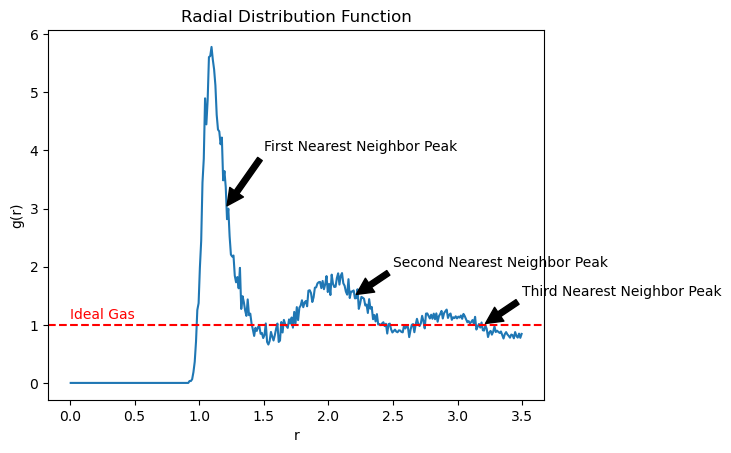

In [6]:
import matplotlib.pyplot as plt

# Plot the radial distribution function
plt.plot(r, g)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')

# Annotate the first peak
first_peak_label = 'First Nearest Neighbor Peak'
plt.annotate(
    first_peak_label,
    xy=(1.2, 3),
    xytext=(1.5, 4),
    arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate the second peak
second_peak_label = 'Second Nearest Neighbor Peak'
plt.annotate(
    second_peak_label,
    xy=(2.2, 1.5),
    xytext=(2.5, 2),
    arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate the third peak
third_peak_label = 'Third Nearest Neighbor Peak'
plt.annotate(
    third_peak_label,
    xy=(3.2, 1),
    xytext=(3.5, 1.5),
    arrowprops=dict(facecolor='black', shrink=0.05))

# Horizontal line at g(r) = 1
plt.axhline(y=1, color='r', linestyle='--')
plt.text(0, 1.1, 'Ideal Gas', color='red')

plt.show()

## Interpretation of the Radial Distribution Function

The radial distribution function provides information about the local structure of a system. Here are some key points to keep in mind when interpreting the radial distribution function:

- $g(r) = 1$ for an ideal gas, indicating no correlation between particles at different distances.
- $g(r) > 1$ for attractive interactions, indicating clustering of particles at certain distances.
- $g(r) < 1$ for repulsive interactions, indicating exclusion of particles at certain distances.
- Peaks in $g(r)$ correspond to the average number of particles at specific distances from a central particle.
- The first peak in $g(r)$ corresponds to the first nearest neighbor distance, the second peak to the second nearest neighbor distance, and so on.
- The height and width of the peaks in $g(r)$ provide information about the strength and range of interactions between particles. Higher, narrower peaks indicate strong, short-range interactions, while broader peaks indicate weaker, longer-range interactions.

## Summary

In this lecture, we introduced the radial distribution function as a measure of the local structure of a fluid or solid. We discussed how to compute the radial distribution function for a given configuration of particles and interpret the results. The radial distribution function provides valuable insights into the interactions between particles in a system and will helps us understand the structure and properties of bead-spring polymers in the next lecture and project.